
# Data Cleaning
The steps and techniques for data cleaning will vary from dataset to dataset. As a result, it's impossible for a single guide to cover everything you might run into.

However, this guide provides a reliable starting framework that can be used every time. We cover common steps such as fixing structural errors, handling missing data, and filtering observations.

So let's put on our boots and clean up this mess!
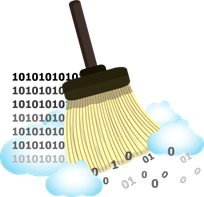
# Better data beats fancier algorithms
Better data beats fancier algorithms.

In other words... garbage in gets you garbage out. 
In fact, if you have a properly cleaned dataset, even simple algorithms can learn impressive insights from the data!

Obviously, different types of data will require different types of cleaning. However, the systematic approach laid out in this lesson can always serve as a good starting point.
# Working with Missing Data in Machine Learning
Missing values are representative of the messiness of real world data. There can be a multitude of reasons why they occur — ranging from human errors during data entry, incorrect sensor readings, to software bugs in the data processing pipeline.

The normal reaction is frustration. Missing data are probably the most widespread source of errors in your code, and the reason for most of the exception-handling. If you try to remove them, you might reduce the amount of data you have available dramatically — probably the worst that can happen in machine learning.

Still, often there are hidden patterns in missing data points. Those patterns can provide additional insight in the problem you’re trying to solve.

    We can treat missing values in data the same way as silence in music — on the surface they might be considered negative (not contributing any information), but inside lies a lot of potential.

# Methods

Note: we will be using Python and a census data set (modified for the purposes of this tutorial)

You might be surprised to find out how many methods for dealing missing data exist. This is a testament to both how important this issue is, and also that there is a lot of potential for creative problem solving.

The first thing you should do is count how many you have and try to visualize their distributions. For this step to work properly you should manually inspect the data (or at least a subset of it) to try to determine how they are designated. Possible variations are: ‘NaN’, ‘NA’, ‘None’, ‘ ’, ‘?’ and others. If you have something different than ‘NaN’ you should standardize them by using np.nan. To construct our visualizations we will use the handy **missingno package**.


In [16]:
import missingno as msno
import numpy as np
import pandas as pd
census_data= pd.read_csv('C:/Users/rzouga/Downloads/Github/DataPreparation/census_data.csv',names=["age","workclass","fnlwgt","education","education.num","marital.status","occupation" ,"relationship","race","sex","capital.gain","capital.loss","hours.per.week","native.country","income"])

census_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


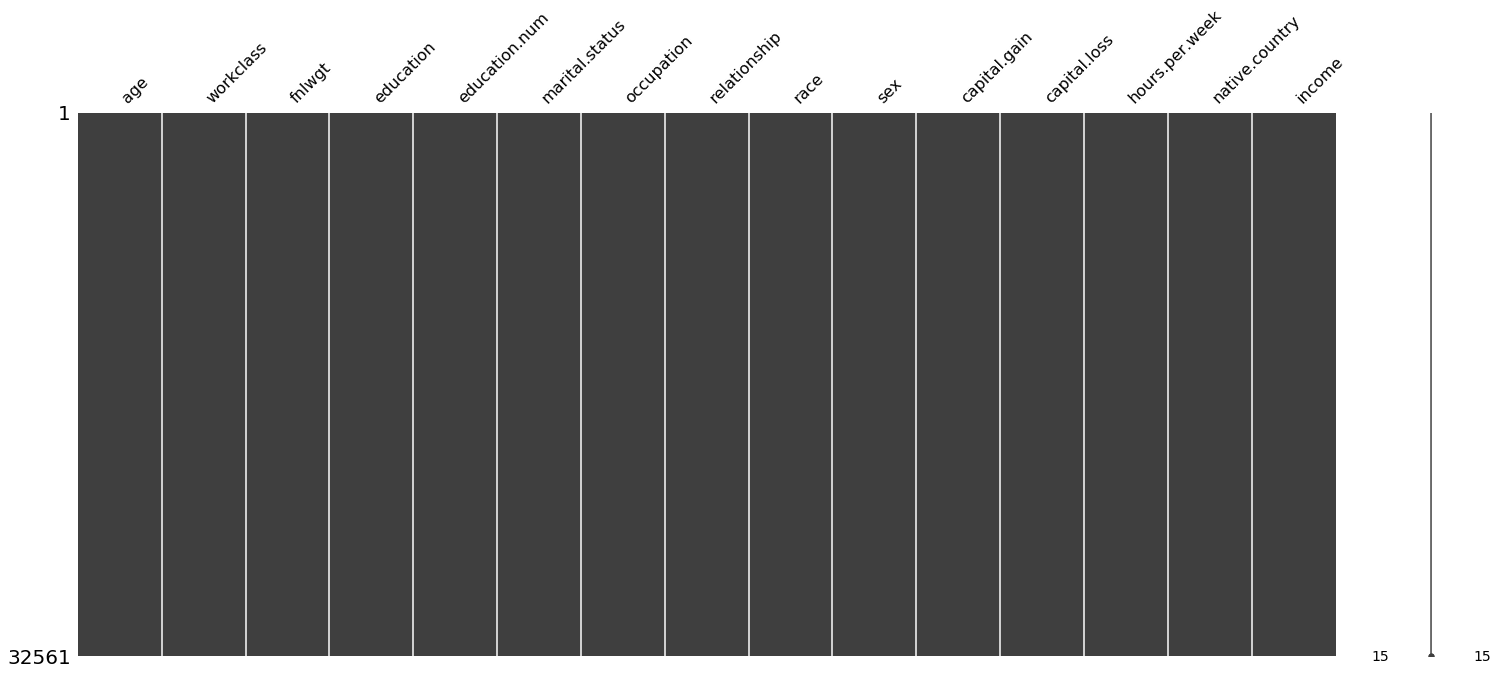

In [17]:
msno.matrix(census_data)

In [20]:
import pandas as pd
census_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Let’s start with the most simple thing you can do: removal. As mentioned before, while this is a quick solution, and might work in some cases when the proportion of missing values is relatively low (<10%), most of the time it will make you lose a ton of data. Imagine that just because of missing values in one of your features you have to drop the whole observation, even if the rest of the features are perfectly filled and informative!

In [19]:
import numpy as np
census_data = census_data.replace('np.nan', 0)

The second-worst method of doing this is replacement with 0 (or -1). While this would help you run your models, it can be extremely dangerous. The reason for this is that sometimes this value can be misleading. Imagine a regression problem where negative values occur (such as predicting temperature) — well in that case this becomes an actual data point.

Now that we have those out of the way, let’s become more creative. We can split the type of missing values by their parent datatype:
# Numerical NaNs

A standard and often very good approach is to replace the missing values with mean, median or mode. For numerical values you should go with mean, and if there are some outliers try median (since it is much less sensitive to them).


In [21]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
census_data[['fnlwgt']] = imputer.fit_transform(census_data[['fnlwgt']])

# Categorical NaNs

Categorical values can be a bit trickier, so you should definitely pay attention to your model performance metrics after editing (compare before and after). The standard thing to do is to replace the missing entry with the most frequent one:

In [22]:
census_data['marital.status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital.status, dtype: int64

In [24]:
most_common=census_data['marital.status'].value_counts().idxmax()
most_common

' Married-civ-spouse'

In [26]:
def replace_most_common(x):
    if pd.isnull(x):
        return most_common
    else:
        return x
census_data = census_data['marital.status'].map(replace_most_common)

# Conclusion

The take-home message is that you should be aware of the different methods available to get more out of missing data, and more importantly start regarding it as a source of possible insight instead of annoyance!

Happy coding :)